In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import cm

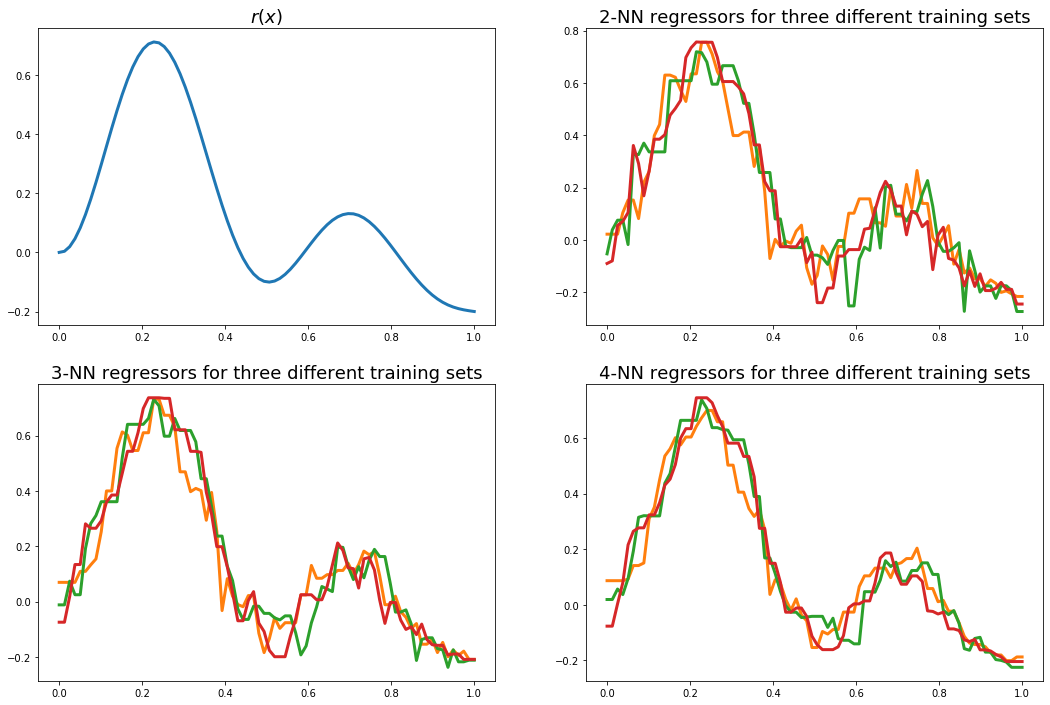

In [2]:
np.random.seed(666)

n = 80
s = 0.1

def r(x): return (1-x)*np.sin(2*np.pi*x)**2 - 0.2*x

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
t = np.linspace(0, 1, n).reshape(-1, 1)
axes[0][0].plot(t, r(t), lw=3, label="$r(x)$")
axes[0][0].set_title("$r(x)$", fontsize=18)

X = np.random.uniform(size=(n, 3))
e = np.random.normal(0, s, size=(n, 3))
y = r(X) + e

y_pr = np.zeros((3, n, 3)) # (k, i, j)

axes[0][1].set_title("2-NN regressors for three different training sets", fontsize=18)
axes[0][1].plot([], [])
k = 2
for j in range(3):
    M = KNeighborsRegressor(n_neighbors=k)
    M.fit(X[:,j].reshape(-1, 1), y[:,j])
    y_pr[0,:,j] = M.predict(t)
    axes[0,1].plot(t, y_pr[0,:,j], lw=3)

axes[1][0].set_title("3-NN regressors for three different training sets", fontsize=18)
axes[1][0].plot([], [])
k = 3
for j in range(3):
    M = KNeighborsRegressor(n_neighbors=k)
    M.fit(X[:,j].reshape(-1, 1), y[:,j])
    y_pr[1,:,j] = M.predict(t)
    axes[1,0].plot(t, y_pr[1,:,j], lw=3)

axes[1][1].set_title("4-NN regressors for three different training sets", fontsize=18)
axes[1][1].plot([], [])
k = 4
for j in range(3):
    M = KNeighborsRegressor(n_neighbors=k)
    M.fit(X[:,j].reshape(-1, 1), y[:,j])
    y_pr[2,:,j] = M.predict(t)
    axes[1,1].plot(t, y_pr[2,:,j], lw=3)


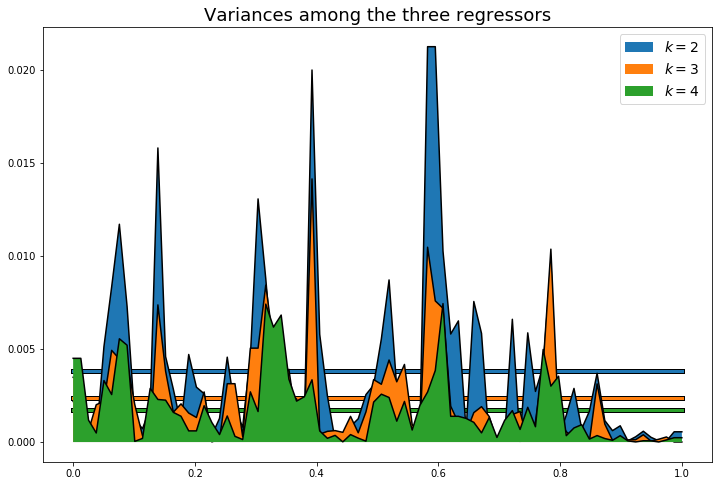

In [7]:
ks = [2, 3, 4]
v = np.var(y_pr, axis=2)
mv = v.mean(axis=1)

plt.figure(figsize=(12, 8))

plt.plot([t[0], t[-1]], [mv[0], mv[0]], 'k', lw=5, zorder=-1)
plt.plot([t[0], t[-1]], [mv[1], mv[1]], 'k', lw=5, zorder=-1)
plt.plot([t[0], t[-1]], [mv[2], mv[2]], 'k', lw=5, zorder=-1)

m0 = plt.plot([t[0], t[-1]], [mv[0], mv[0]], 'C0', lw=3, zorder=-1)
m1 = plt.plot([t[0], t[-1]], [mv[1], mv[1]], 'C1', lw=3, zorder=-1)
m2 = plt.plot([t[0], t[-1]], [mv[2], mv[2]], 'C2', lw=3, zorder=-1)


for i, k in enumerate(ks):
    plt.fill_between(t.squeeze(), v[i,:], label=f"$k={k}$", zorder=k)
    plt.plot(t, v[i,:], 'k', zorder=k)
plt.legend(fontsize=14)
plt.title("Variances among the three regressors", fontsize=18);

In [ ]:
np.random.seed(666)
n = 75
p = 100
q = 7
s = 0.1

# def r(x): return (1-x)*np.sin(2*np.pi*x)**2 - 0.2*x
def r(x): return 1 - (x + 0.3)**2

X_tr = np.random.uniform(size=(n, p))
e_tr = np.random.normal(0, s, size=(n, p))
y_tr = r(X_tr) + e_tr

while True:
    X_te = np.random.uniform(size=(q, 1)).reshape(-1, 1)
    D = np.identity(q) + np.abs(X_te - X_te.T)
    if np.min(D) >= 1/(2*q):
        break

fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharex=True, sharey=True)

ks = [[1, 4], [7, 10]]

for a in range(2):
    for b in range(2):
        y_pr = np.zeros((q, p))
        for j in range(p):
            M = KNeighborsRegressor(n_neighbors=ks[a][b])
            M.fit(X_tr[:, j].reshape(-1, 1), y_tr[:, j])
            y_pr[:, j] = M.predict(X_te)

        axes[a][b].set_title(f"$k = {ks[a][b]}$", fontsize=28)
        axes[a][b].plot(t, r(t), lw=3)
        box = axes[a][b].boxplot(y_pr.T, positions=X_te.squeeze(), widths=0.06, manage_ticks=False, patch_artist=True);
        for b in box["boxes"]: b.set_facecolor("pink")

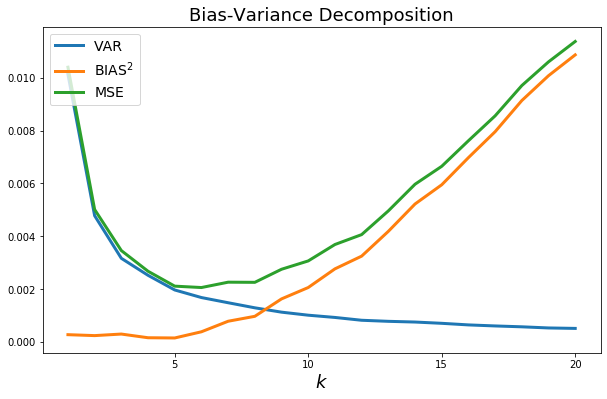

In [11]:
np.random.seed(666)
train_set_size = 75
n_fits = 100
test_set_size = 7
s = 0.1
ks = np.arange(1, 21)


def r(x): return 1 - (x + 0.3)**2

X_tr = np.random.uniform(size=(train_set_size,1))
e_tr = np.random.normal(0, s, size=(train_set_size, n_fits))
y_tr = r(X_tr) + e_tr

while True:
    X_te = np.random.uniform(size=(test_set_size, 1))
    D = np.identity(test_set_size) + np.abs(X_te - X_te.T)
    if np.min(D) >= 1/(2*test_set_size):
        break

r_hat = np.zeros((len(ks), test_set_size, n_fits))

for u, k in enumerate(ks):
    for j in range(n_fits):
        M = KNeighborsRegressor(n_neighbors=k)
        M.fit(X_tr, y_tr[:, j])
        r_hat[u, :, j] = M.predict(X_te)

plt.figure(figsize=(10, 6))
var = r_hat.var(axis=2)
plt.plot(ks, var.mean(axis=1), lw=3, label="VAR")

bias2 = (r_hat.mean(axis=2) - r(X_te).reshape(1, -1))**2
plt.plot(ks, bias2.mean(axis=1), lw=3, label="BIAS$^2$")

mse = np.square(r_hat - r(X_te).reshape(1, -1, 1))
plt.plot(ks, mse.mean(axis=(1,2)), lw=3, label="MSE")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("$k$", fontsize=18)
plt.title("Bias-Variance Decomposition", fontsize=18)
plt.xticks([5, 10, 15, 20]);

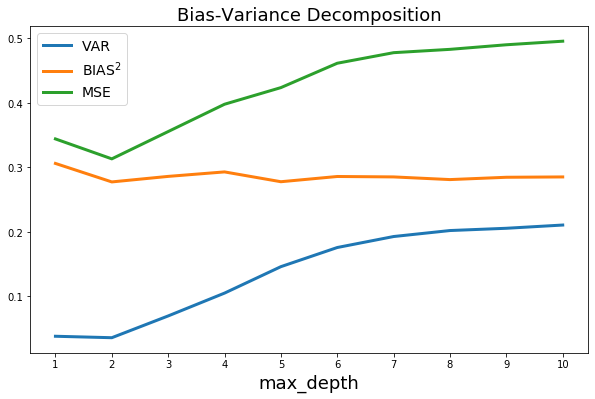

In [14]:
np.random.seed(666)
N = 100
n_tr = 50
n_te = 100
ks = np.arange(1, 11)


def r(X):
    return np.sin(5*X[...,0]) ** 10 + np.cos(10 + 5*X[..., 1] * 5*X[..., 0]) * np.cos(5*X[..., 0])

X_tr = np.random.uniform(size=(n_tr, 2))
e_tr = np.random.normal(0, 0.3, size=(n_tr, N))
y_tr = r(X_tr).reshape(-1, 1) + e_tr

X_te = np.random.uniform(size=(n_te, 2))

r_hat = np.zeros((len(ks), n_te, N))

for u, k in enumerate(ks):
    for j in range(N):
        M = DecisionTreeRegressor(**{param: k})
        M.fit(X_tr, y_tr[:, j])
        r_hat[u, :, j] = M.predict(X_te)

plt.figure(figsize=(10, 6))
var = r_hat.var(axis=2)
var.mean(axis=1).shape
plt.plot(ks, var.mean(axis=1), lw=3, label="VAR")

bias2 = (r_hat.mean(axis=2) - r(X_te).reshape(1, -1))**2
plt.plot(ks, bias2.mean(axis=1), lw=3, label="BIAS$^2$")

mse = np.square(r_hat - r(X_te).reshape(1, -1, 1))
plt.plot(ks, mse.mean(axis=(1,2)), lw=3, label="MSE")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("max_depth", fontsize=18)
plt.title("Bias-Variance Decomposition", fontsize=18)
plt.xticks(ks);

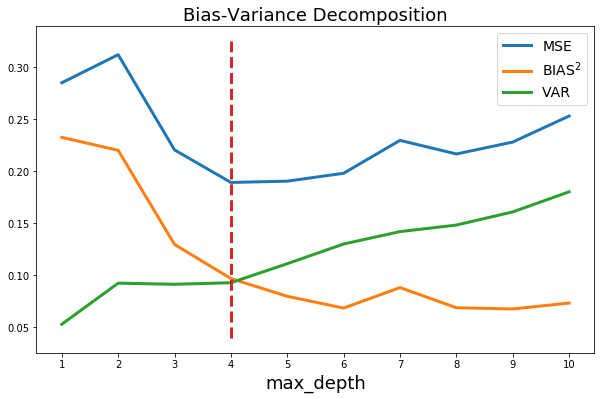

In [30]:
np.random.seed(666)
p = 10
n_tr = 500
N = 100
param = "max_depth"
ks = np.arange(1, 11)


b = 2*(np.random.uniform(size=p) - 0.5)
def r(x): return x.dot(b)

X_te = np.random.uniform(size=(1, p)).reshape(1, -1)

X_tr = np.random.uniform(size=(n_tr, p))
e_tr = np.random.normal(0, 0.2, size=n_tr)
y_tr = r(X_tr) + e_tr

r_hat = np.zeros((len(ks), N))

for j in range(N):
    X_tr = np.random.uniform(size=(n_tr, p))
    e_tr = np.random.normal(0, 0.2, size=n_tr)
    y_tr = r(X_tr) + e_tr
    for u, k in enumerate(ks):
        M = DecisionTreeRegressor(**{param: k})
        M.fit(X_tr, y_tr)
        r_hat[u, j] = M.predict(X_te).item()

bias = r_hat.mean(axis=1) - r(X_te)
var = r_hat.var(axis=1)
mse = bias**2 + var

plt.figure(figsize=(10, 6))
plt.xlabel(param, fontsize=18)
plt.title("Bias-Variance Decomposition", fontsize=18)
plt.plot(ks, mse, label="MSE", lw=3)
plt.plot(ks, bias**2, label="BIAS$^2$", lw=3)
plt.plot(ks, var, label="VAR", lw=3)
plt.xticks(ks)
plt.legend(fontsize=14)
ymin, ymax = plt.ylim()
kmin = ks[mse.argmin()]
plt.plot([kmin, kmin], [ymin, ymax], "--", lw=3)
# var = r_hat.var(axis=2)
# var.mean(axis=1).shape
# plt.plot(ks, var.mean(axis=1), lw=3, label="VAR")

# bias2 = (r_hat.mean(axis=2) - r(X_te).reshape(1, -1))**2
# plt.plot(ks, bias2.mean(axis=1), lw=3, label="BIAS$^2$")

# mse = np.square(r_hat - r(X_te).reshape(1, -1, 1))
# plt.plot(ks, mse.mean(axis=(1,2)), lw=3, label="MSE")
# plt.legend(loc="upper left", fontsize=14)
# plt.xlabel("max_depth", fontsize=18)
# plt.title("Bias-Variance Decomposition", fontsize=18)

$$
E_D[\widehat{r}(x_0)]\approx \frac1N\sum_{i=1}^N \widehat{r}_i(x_0)
$$

$$
\operatorname{Bias}(\widehat{r}(x_0), r(x_0)) = E_D[\widehat{r}(x_0)] - r(x_0) \approx \frac1N\sum_{i=1}^N \widehat{r}_i(x_0) - r(x_0)
$$

$$
\operatorname{Var}\widehat{r}(x_0) = E_D\big[\big(\widehat{r}(x_0) - E_D[\widehat{r}(x_0)]\big)^2\big]
$$



In this problem, we examine the bias-variance decomposition for regression trees using a synthetic data set with
$$p = 10$$
features.

Let $$\beta\in \mathbb{R}^{p\times 1}$$ and define a function $r$ from $\mathbb{R}^{1\times p}$ into $\mathbb{R}$ by $$r(x) = x\beta.$$

In [35]:
np.random.seed(123)
p = 10
beta = np.random.uniform(size=p)
def r(x): return x.dot(beta)

In practice, we do not know $r$. Rather, we need to estimate it using data.

So let $D=(X,Y)$,
$$X\in \mathbb{R}^{n\times p}\qquad\text{and}\qquad  Y\in \mathbb{R}^{n\times 1},$$
be a random sample from $P_\text{data}(X,Y)$.

By "estimate $r$ from data", we mean: Fit a regression model $P_{\text{model}}(Y|X, D)$ to $D$ such that
$$
\widehat{r}_D(X) := E[Y|X, D] \approx r(X),
\qquad\text{where}\qquad
Y\sim P_{\text{model}}(Y|X, D).
$$
By $\approx$, we mean in the sense of mean squared error, conditioning on $D$.
$$
\widehat{r}_D(X) \approx r(X)
\Longleftrightarrow
\operatorname{MSE}(\widehat{r}_D(X), r(X)|D)\,\text{ is small.}
$$

By definition,
$$
\operatorname{MSE}(\widehat{r}_D(X), r(X)|D)
= E[(\widehat{r}_D(X), r(X))^2|D],
\quad\text{where}\quad
X\sim P_{\text{data}}(X),\quad\text{and}\quad X\perp D.
$$

As always, we have a bias-variance decomposition for
$\operatorname{MSE}(\widehat{r}_D(X), r(X)|D)$:
$$
\operatorname{MSE}(\widehat{r}_D(X), r(X)|D)
= E[\hat{r}_D(X) - r(X)|D]^2 + \operatorname{Var}[\widehat{r}_D(X)|D]
$$

In [45]:
np.random.seed(666)

p = 10

b = 2*(np.random.uniform(size=p) - 0.5)
def r(x): return x.dot(b)


n_tr = 300
n_te = 60

# param = "max_depth"
# ks = np.arange(1, 11)

X_tr = np.random.uniform(size=(n_tr, p))
y_tr = r(X_tr) + np.random.normal(0, 0.2, size=n_tr)

M = DecisionTreeRegressor(max_depth=1)
M.fit(X_tr, y_tr)

X_te = np.random.uniform(size=(n_te, p))
r_hat = M.predict(X_te)

mse = np.mean(np.square(r_hat - r(X_te)))
bias = np.mean(r_hat - r(X_te))
var = np.var(r_hat)

print(mse, bias**2, var, bias**2 + var)

0.24969542044501356 0.0011586901732261784 0.03064515153987769 0.03180384171310387


We are given:
- a random sample (i.e., a data set)
$$D=\{(x_1,y_1),\ldots,(x_n, y_n)\}$$
drawn from $p_{\text{data}}(x,y)$,
- a "test point" $x_0$ drawn from the marginal distribution $p_{\text{data}}(x)$, independent of $D$.

In [69]:
np.random.seed(666)
sigma = 0.2
p = 10 # number of features
n = 300 # size of training set

b = 2*(np.random.uniform(size=p) - 0.5)
def r(x):
    return np.array(x).dot(b)

x = np.random.uniform(size=(n, p))
y = r(x) + np.random.normal(0, sigma, size=n)

x_0 = np.random.uniform(size=(1, p))

Using $D$, we construct a conditional model
$$\hat{M}=\hat{M}(x) = p_{\text{model}}(y|x)$$
(e.g., using maximum likelihood) that ostensibly resembles the conditional model
$$M=M(x) := p_{\text{data}}(y|x)$$
derived from the data generating distribution $p_{\text{data}}(x,y)$.  Let
$$
\hat{r}(x) = E_{y\sim \hat{M}}[y|x].
$$
We hope to use $\hat{r}$ to approximate the regression function
$$
r(x) = E_{y\sim M}[y|x]\tag{#}
$$
of $p_{\text{data}}(x,y)$.

In [114]:
max_depth = 3
M_hat = DecisionTreeRegressor(max_depth=max_depth)
M_hat.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

View
$$y_0|x_0\sim M(x=x_0)$$
as a point estimate of $\hat{r}(x_0)$.
(Having conditioned on $x=x_0$, the quantity $\hat{r}(x_0)$ becomes a parameter to be estimated.)

We use mean squared error to assess the quality of this estimator:
$$
\operatorname{MSE}(y_0, \hat{r}(x_0)) = E_{y_0\sim M}[(y_0 - \hat{r}(x_0))^2|x_0]
$$

In [113]:
m = 10**6 # size of test set

y_0 = r(x_0) + np.random.normal(0, sigma, size=m)

mse = np.mean(np.square(y_0 - M.predict(x_0)))
mse

0.06235715119033281

The mean squared error of a point estimate admits a bias-variance decomposition:
$$
\operatorname{MSE}(y_0, \hat{r}(x_0)) = \operatorname{Bias}(y_0, \hat{r}(x_0))^2 + \operatorname{Var}[y_0|x_0]
$$

Using (#), we have
$$
\operatorname{Bias}(y_0, \hat{r}(x_0)) = r(x_0) - \hat{r}(x_0)
$$
and
$$
\operatorname{Var}[y_0|x_0] = E_{y_0\sim M}[(y_0-r(x_0))^2|x_0].
$$

The term $\operatorname{Var}[y_0|x_0]$ is called the **irreducible error**.
It doesn't depend on our training set $D$, just on the underlying data generating distribution $p_{\text{data}}(x,y)$.

In [98]:
bias = r(x_0) - M.predict(x_0) 
var = np.var(y_0)

mse - (bias.item()**2 + var)

-3.254112357856803e-05

The mean squared error $\operatorname{MSE}(y_0, \hat{r}(x_0))$ computed for a *single* $x$-value $x_0$ is unlikely to be reflective of the prediction error we should expect from our fit model $\hat M$. To get an holistic assessment of the predictive utility of $\hat M$, we should consider average over $x$-values, too. Define the **integrated mean squared error** of $\hat M$ to be

$$
\begin{aligned}
\operatorname{IMSE}(\hat M)
&= E_{x_0\sim p_{\text{data}}(x)}[\operatorname{MSE}(y_0, \hat{r}(x_0))]\\[1ex]
&= E_{x_0\sim p_{\text{data}}(x)}\big[E_{y_0\sim p_{\text{data}}(y|x)}[(y_0 - \hat{r}(x_0))^2|x_0]\big].
\end{aligned}
$$

By the **<a href="https://en.wikipedia.org/wiki/Law_of_total_expectation">law of total expectation</a>**,

$$
E_{x_0\sim p_{\text{data}}(x)}\big[E_{y_0\sim p_{\text{data}}(y|x)}[(y_0 - \hat{r}(x_0))^2|x_0]\big]
= E_{(x_0,y_0)\sim p_{\text{data}}(x,y)}[(y_0 - \hat{r}(x_0))^2].\tag{##}
$$

The right hand side reflects the usual process of averaging over a test set drawn from the same distribution as --- but independently from --- $D$.

In [162]:
# Evaluate left hand side of (##).

q = 1000
m = 1000
mses = []
for i in range(q):
    x_0 = np.random.uniform(size=(1, p))
    M_hat.fit(x, y)
    y_0 = r(x_0) + np.random.normal(0, sigma, size=m)
    mse = np.mean(np.square(y_0 - M_hat.predict(x_0)))
    mses.append(mse)

mses = np.array(mses)
lhs_imse = mses.mean()
print(lhs_imse)

# Evaluate right hand side of (##)

from sklearn.metrics import mean_squared_error
m = 10000
x_te = np.random.uniform(size=(n_te, p))
y_te = r(x_te) + np.random.normal(0, sigma, size=n_te)
rhs_imse = mean_squared_error(y_te, M_hat.predict(x_te))
print(rhs_imse)

0.26670935255800976
0.2703004446651651


IMSE is a measure of the predictive quality of a **single trained (i.e., already fit to data) model**, $\hat M$.

This model has, presumably, been chosen from a family of models $M_k$, where $k$ is a hyperparameter controlling **model complexity**. Typically, models with low complexity have low variance but high bias while models with high complexity have high variance but low bias. To the dependence of MSE, bias and variance of a family of models, we need to randomize the training set.

$$
\begin{aligned}
E_D[\operatorname{Bias}(y, \hat{r})^2] &= E_D[(\hat r - r)^2]\\
&= E_D\big[\big((\hat r - E_D\hat r) + (E_D\hat r - r)\big)^2\big]\\
&= E_D[(\hat r - E_D\hat r)^2]
+ E_D[(E_D\hat r - r)^2]
+ 2E_D[(\hat r - E_D\hat r)(E_D\hat r - r)]\\
&= \operatorname{Var}\hat r
+ \operatorname{Bias}(\hat r, r)^2
+ 2(E_D\hat r - r)\underbrace{E_D[(\hat r - E_D\hat r)]}_{=0}\\
&= \operatorname{Var}\hat r
+ \operatorname{Bias}(\hat r, r)^2
\end{aligned}
$$

$$
E_D\operatorname{MSE}(y_0, \hat{r}(x_0)) = \operatorname{Var}[y_0|x_0] + \operatorname{Var}_D\hat r(x_0)
+ \operatorname{Bias}_D(\hat r(x_0), r(x_0))^2
$$






In [111]:
ks = np.arange(1, 51)

mses = []
biases = []
vars_ = []
 
for k in ks:
    M_hat = DecisionTreeRegressor(max_depth=k)
    y_0 = r(x_0) + np.random.normal(0, sigma, size=m)
    mse = np.mean(np.square(y_0 - M_hat.predict(x_0)))
    bias = r(x_0) - M_hat.predict(x_0) 
    var = np.var(y_0)
    mses.append(mse)
    biases.append(bias)
    vars_.append(var)

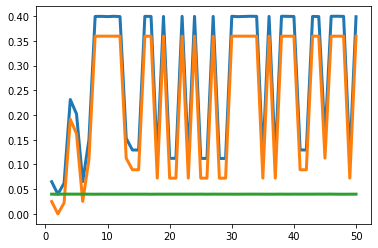

In [112]:
plt.plot(ks, mses, lw=3)
plt.plot(ks, np.array(biases)**2, lw=3)
plt.plot(ks, vars_, lw=3)

In [106]:
mses

[0.06511542097185094,
 0.04005035486438946,
 0.062401176928454705,
 0.23131444157783407,
 0.2024650273187967,
 0.06538861746563016,
 0.14996872796203956,
 0.39934856377577377,
 0.39998771331151234,
 0.12086242663952526,
 0.11259288983103267,
 0.11234138322419464,
 0.39987313499642807,
 0.39919569869301613,
 0.39919329735773956]

In [1]:
print("Hi, mom!")

Hi, mom!
